In [1]:
#Running only on columns with a correlation of .5 or higher from the Lauren_Cluster worksheet
#'GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score', 'Beer_Servings', 'Wine_Servings','HDI', 'Schooling'

In [2]:
#working from this walk through
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177816-understand-how-k-means-clustering-works

In [3]:
#Starting here:
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177851-carry-out-a-k-means-clustering

In [4]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 

#import the kmeans algorithm
from sklearn.cluster import KMeans

#import functions from the tutorial
from functions import *

In [5]:
#load the cleaned & scaled data
happy_df = pd.read_csv("Resources/Data/scaled_data.csv")
happy_data = happy_df[['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score', 'Beer_Servings', 'Wine_Servings','HDI', 'Schooling']]
happy_data.head()

,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Beer_Servings,Wine_Servings,HDI,Schooling
0,0.929138,0.979132,0.936153,0.973512,0.699468,0.262162,0.941983,0.833333
1,0.940905,0.980836,0.942685,0.975842,0.595745,0.751351,0.973629,0.941176
2,0.958889,0.967350,0.964818,0.944962,0.492021,0.756757,0.989451,0.784314
3,0.940779,1.000000,0.950464,0.973224,0.619681,0.210811,0.969409,0.931373
4,0.968310,0.977240,0.953078,0.980259,0.449468,0.348649,1.000000,0.867647


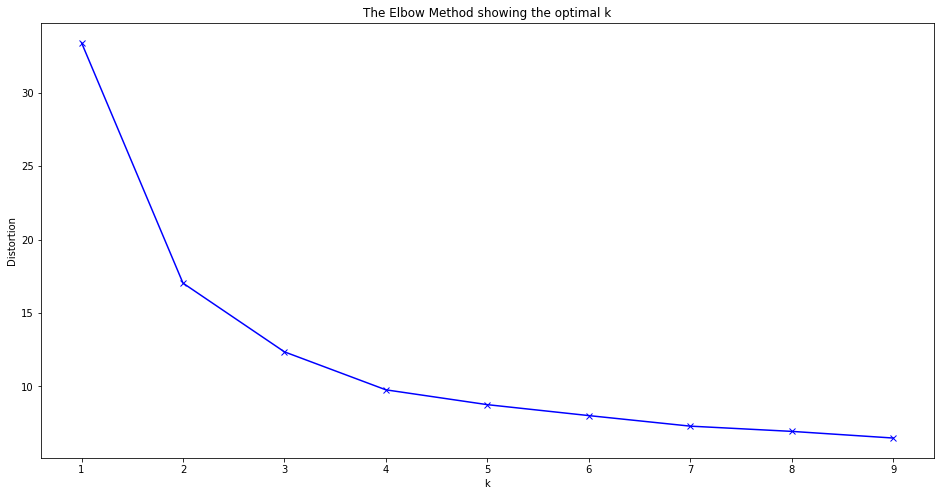

In [6]:
#Running elbow method on the limited data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(happy_data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:
#Skipped the steps scaling & cleaning the data as we already performed this
#First using 2 clusters based on the elbow method done above. Will run 3 after.

#Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=2, n_init=10)

#Fit the data to the model
kmeans.fit(happy_data)

#Determine which clusters each data point belongs to:
clusters = kmeans.predict(happy_data)

In [8]:
#et's add a new column, cluster number to the original data so we can see what countries sit in what cluster:

#Add cluster number to the original data
happy_clustered = pd.DataFrame(happy_data, columns=happy_data.columns, index = happy_data.index)
happy_clustered['cluster'] = clusters

happy_clustered.head()

,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Beer_Servings,Wine_Servings,HDI,Schooling,cluster
0,0.929138,0.979132,0.936153,0.973512,0.699468,0.262162,0.941983,0.833333,0
1,0.940905,0.980836,0.942685,0.975842,0.595745,0.751351,0.973629,0.941176,0
2,0.958889,0.967350,0.964818,0.944962,0.492021,0.756757,0.989451,0.784314,0
3,0.940779,1.000000,0.950464,0.973224,0.619681,0.210811,0.969409,0.931373,0
4,0.968310,0.977240,0.953078,0.980259,0.449468,0.348649,1.000000,0.867647,0


In [9]:
# Moving to next step of the tutorial, "Analyze the Results of a K-means Clustering"
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177861-analyze-the-results-of-a-k-means-clustering

In [10]:
from sklearn.decomposition import PCA

#Create a PCA model to reduce our data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(happy_data)

#Transfer the scaled data to the new PCA space
happy_reduced = pca.transform(happy_data)

In [11]:
#Convert to a data frame
happy_reduced_df = pd.DataFrame(happy_reduced, index = happy_data.index, columns=['PC1', 'PC2'])
happy_reduced_df['cluster'] = clusters
happy_reduced_df.head()

,PC1,PC2,cluster
0,0.858366,-0.051368,0
1,0.985844,-0.241013,0
2,0.921224,-0.208391,0
3,0.838467,-0.120026,0
4,0.804429,-0.175991,0


In [12]:
#centers giving problems atm so just striking them from the code for now
# centres_reduced = pca.transform(kmeans.cluster_centers_)

In [13]:
# display_factorial_planes(happy_data, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
# plt.scatter(centres_reduced[:,0], centres_reduced[:,1],
#            marker='x', s=169, linewidth=3,
#            color='r', zorder=10)

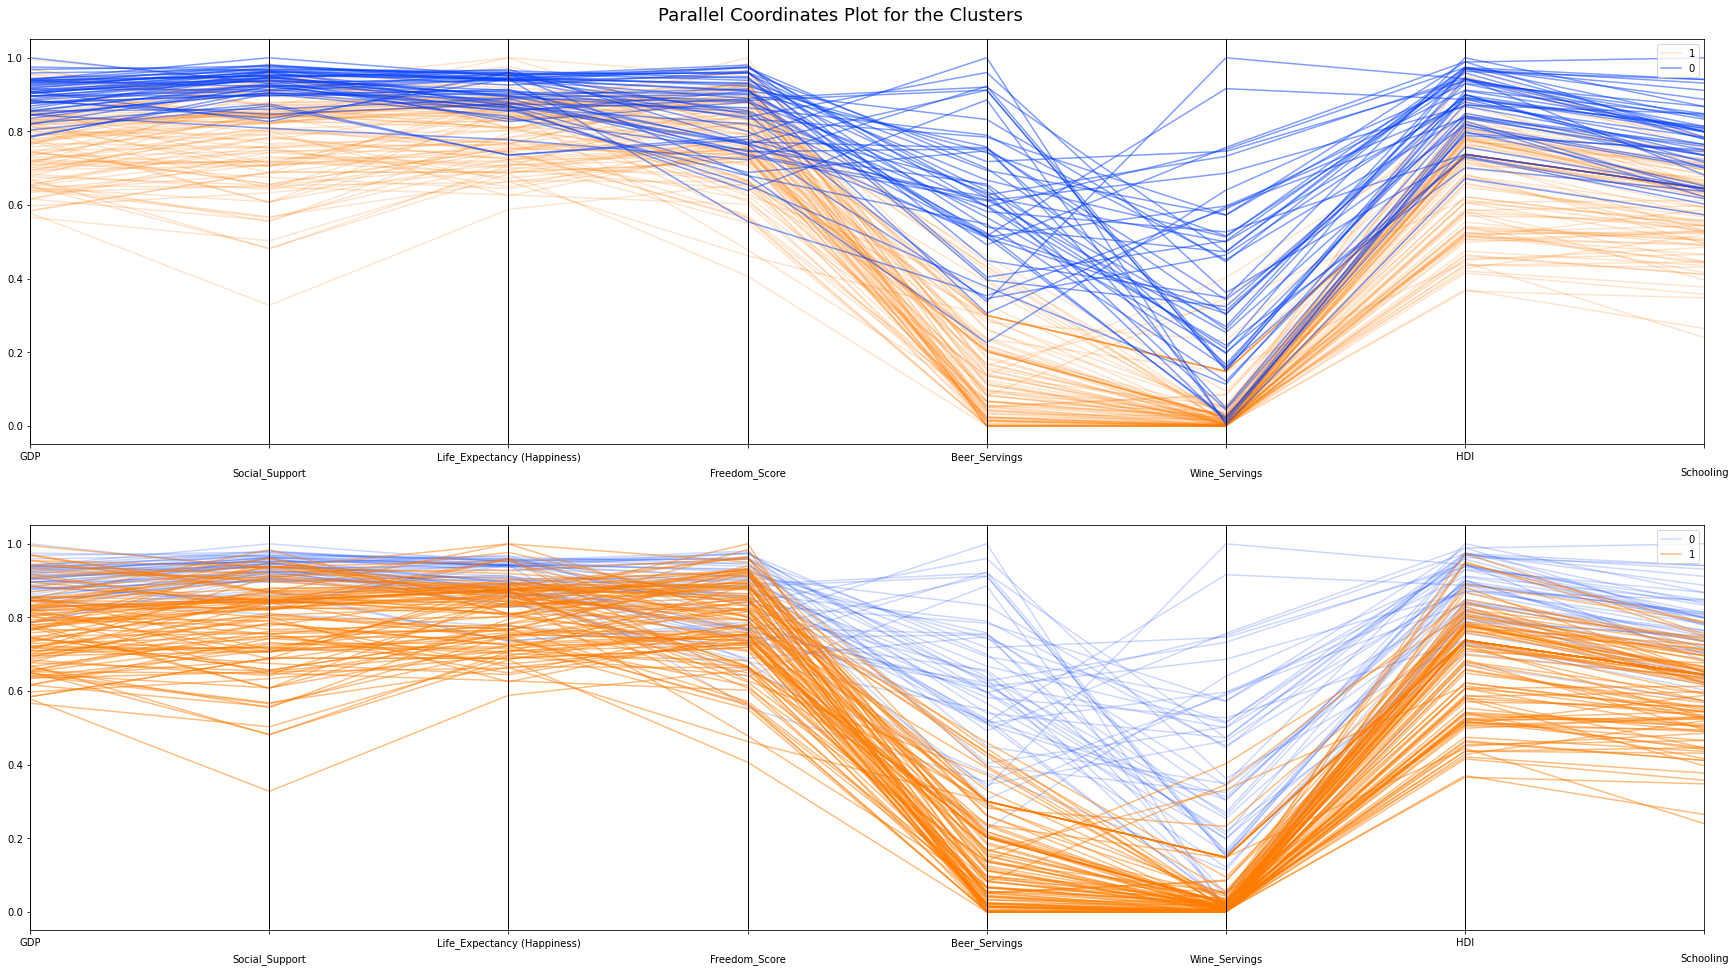

In [14]:
#display parallel coordinates plots, one for each cluster
display_parallel_coordinates(happy_clustered, 2)

In [15]:
#Group 0 appears to have more/higher quantities of the following:
##### Life_Expectancy(Happiness), Freedom_Score
#Group 0 has significantly lower social Support, HDI, and Schooling

#Group 1 appears to have more/higher quantities of the following:
####Social Support, Beer_Servings, Wine Servings, & HDI
#Group 1 doesn't seem to have many values that dip below anything of Group 0

In [16]:
#create a data frame containing our centroids
# centroids = pd.DataFrame(kmeans.cluster_centers_, columns=happy_data.columns)
# centroids['cluster'] = centroids.index

# display_parallel_coordinates_centroids(centroids,10)

In [17]:
#Now using 3 clusters.

#Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

#Fit the data to the model
kmeans.fit(happy_data)

#Determine which clusters each data point belongs to:
clusters = kmeans.predict(happy_data)

In [18]:
#et's add a new column, cluster number to the original data so we can see what countries sit in what cluster:

#Add cluster number to the original data
happy_clustered = pd.DataFrame(happy_data, columns=happy_data.columns, index = happy_data.index)
happy_clustered['cluster'] = clusters

happy_clustered.head()

,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Beer_Servings,Wine_Servings,HDI,Schooling,cluster
0,0.929138,0.979132,0.936153,0.973512,0.699468,0.262162,0.941983,0.833333,1
1,0.940905,0.980836,0.942685,0.975842,0.595745,0.751351,0.973629,0.941176,1
2,0.958889,0.967350,0.964818,0.944962,0.492021,0.756757,0.989451,0.784314,1
3,0.940779,1.000000,0.950464,0.973224,0.619681,0.210811,0.969409,0.931373,1
4,0.968310,0.977240,0.953078,0.980259,0.449468,0.348649,1.000000,0.867647,1


In [19]:
from sklearn.decomposition import PCA

#Create a PCA model to reduce our data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(happy_data)

#Transfer the scaled data to the new PCA space
happy_reduced = pca.transform(happy_data)

In [20]:
#Convert to a data frame
happy_reduced_df = pd.DataFrame(happy_reduced, index = happy_data.index, columns=['PC1', 'PC2'])
happy_reduced_df['cluster'] = clusters
happy_reduced_df.head()

,PC1,PC2,cluster
0,-0.005243,0.537068,1
1,-0.025273,0.755421,1
2,-0.010578,0.650979,1
3,-0.015903,0.500819,1
4,-0.010987,0.448757,1


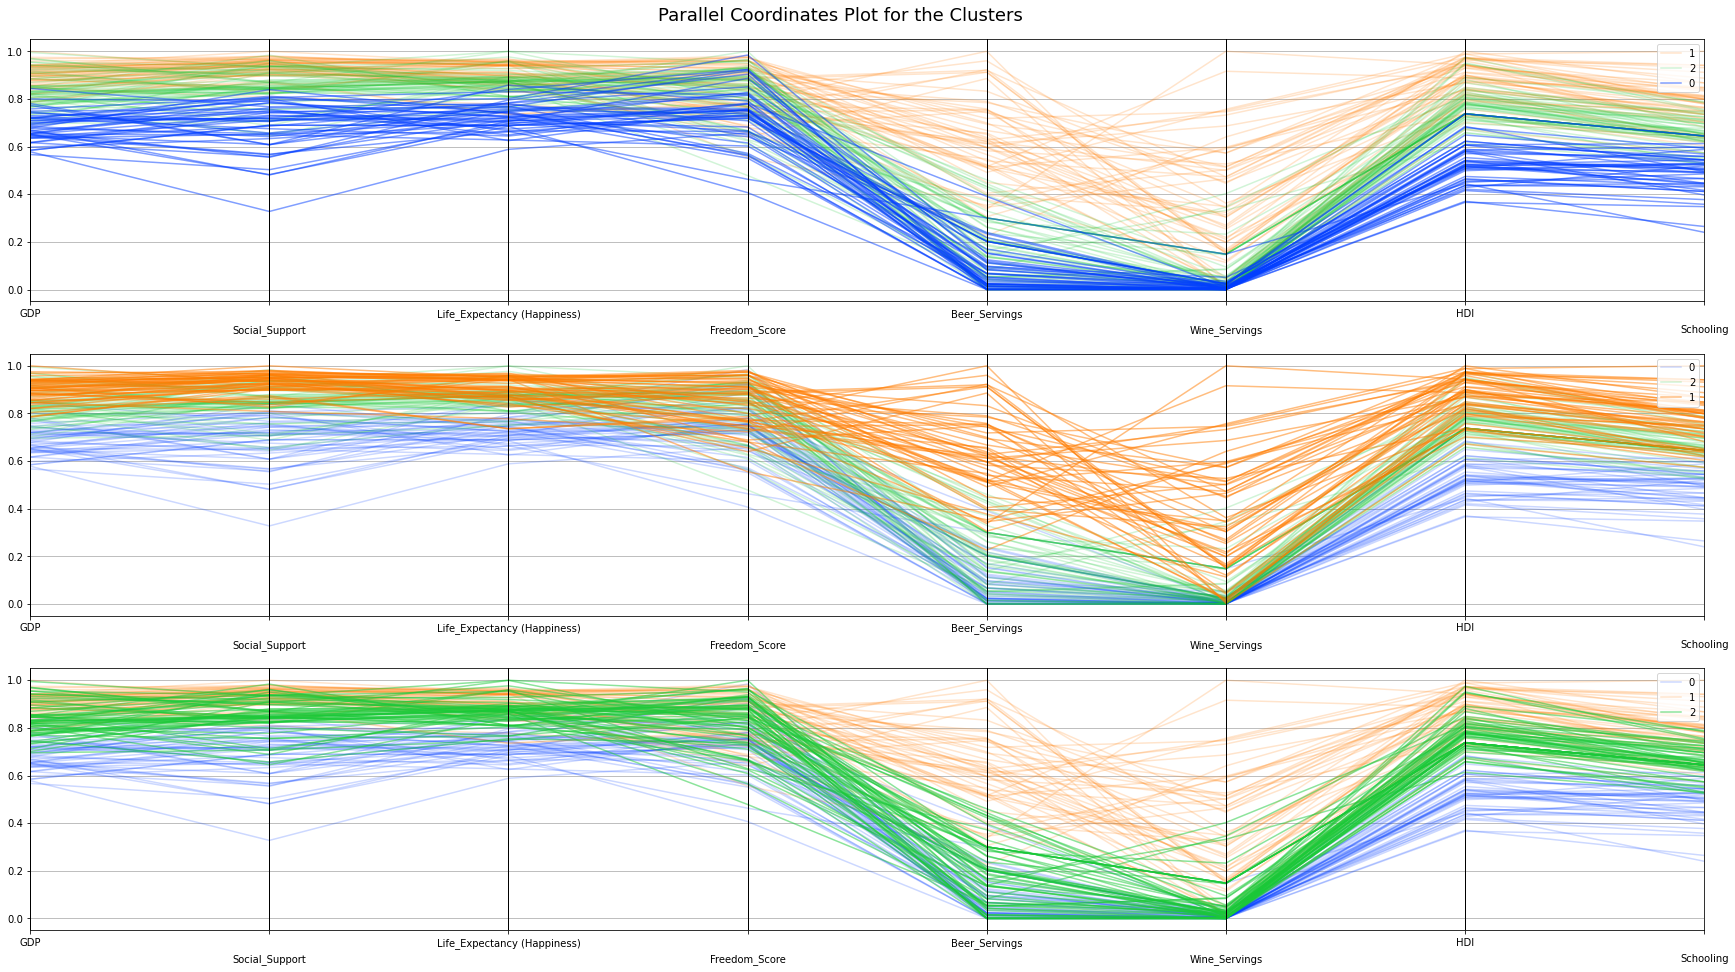

In [21]:
#display parallel coordinates plots, one for each cluster
display_parallel_coordinates(happy_clustered, 3)

In [ ]:
#Initial Analysis:
#Cluster 0 (blue):
## High in: freedom_score
## Lowest in: social_support, life_expectancy(happiness), freedom_score, HDI, Schooling, GDP

#Cluster 1 (orange):
## High in: social_support, beer_servings, wine_servings, HDI, schooling
## Lowest in: Nothing catches my eye initially

#Cluster 2 (green)
## High in: GDP, life_expectancy(happiness), freedom_score, HDI is at least higher than cluster 0
## Lowest in: beer servings, wine servings